In [ ]:
import os
import dotenv

dotenv.load_dotenv()



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
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


In [2]:
LANGCHAIN_TRACING_V2=True
LANGCHAIN_ENDPOINT="https://api.smith.langchain.com"
LANGCHAIN_API_KEY=os.getenv("LANGSMITH_API_KEY")
LANGCHAIN_PROJECT="first-project"

In [3]:
from langchain_groq import ChatGroq
llm=ChatGroq(api_key=os.getenv("GROQ_API_KEY"),model="llama3-8b-8192")

In [4]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
class State(TypedDict):
       messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [5]:
def chatbot(state:State):
    return {"messages":llm.invoke(state["messages"])}

graph_builder.add_node("chatbot",chatbot)
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [6]:
graph=graph_builder.compile()

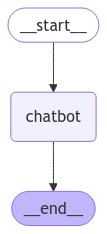

In [7]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [8]:
while True:
    user_input=input("User: ",)
    if user_input.lower() in ["quit","exit","q"]:
        print("GoodBye!! Sayonara")
        break
    for event in graph.stream({'messages':("user",user_input)}):
        print(event.values())
        for value in event.values():
            
            print("Assistant: ",value["messages"].content)
    
        

dict_values([{'messages': AIMessage(content='It seems like you just sent a single letter "e". Is there something specific you\'d like to talk about or ask? I\'m here to help with any questions you might have!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 11, 'total_tokens': 49, 'completion_time': 0.031666667, 'prompt_time': 0.000100679, 'queue_time': 0.013290218000000001, 'total_time': 0.031767346}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_179b0f92c9', 'finish_reason': 'stop', 'logprobs': None}, id='run-e07da8c1-a823-4b12-a223-905d14815634-0', usage_metadata={'input_tokens': 11, 'output_tokens': 38, 'total_tokens': 49})}])
Assistant:  It seems like you just sent a single letter "e". Is there something specific you'd like to talk about or ask? I'm here to help with any questions you might have!
GoodBye!! Sayonara


In [ ]:
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2,tavily_api_key=os.getenv("TAVILY_API_KEY"))
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

[{'url': 'https://medium.com/@cplog/introduction-to-langgraph-a-beginners-guide-14f9be027141',
  'content': 'Nodes: Nodes are the building blocks of your LangGraph. Each node represents a function or a computation step. You define nodes to perform specific tasks, such as processing input, making'},
 {'url': 'https://www.datacamp.com/tutorial/langgraph-tutorial',
  'content': "In LangGraph, each node represents an LLM agent, and the edges are the communication channels between these agents. This structure allows for clear and manageable workflows, where each agent performs specific tasks and passes information to other agents as needed. State management. One of LangGraph's standout features is its automatic state"}]

In [ ]:
from typing import Annotated

from langchain_groq import ChatGroq
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2,tavily_api_key=os.getenv("TAVILY_API_KEY"))
tools = [tool]
class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


llm=ChatGroq(api_key=os.getenv("GROQ_API_KEY"),model="llama3-8b-8192")
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)